정리

In [ ]:

#SCFI Comprehensive Container Freight Rate Index: SCFI 종합 컨테이너 운임지수
#나머지는 항로별 컨테이너 운임지수

#외부변수.csv
# Clarksons Average Containership Earnings: 용선료( 해운사가 선박을 빌려 쓰는 대신에 선주(배의 주인)에게 지불하는 일종의 임대료)
# HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam: 연료유가
# Total Containerships - % Idle/Laid Up/Scrubber Retrofit: ?
# Newbuilding Prices: 신조선가(선박을 새로 만드는 가격)
# 5 Year $10m Finance based on Libor 1st yr: 이자율
# Exchange Rates: 환율은 크게 상관없을거라고 하셔서 csv 파일에는 제외

#항만 대기량
# Port Congestion Index - Containerships In Port, m.TEU, 7dma: 전 세계 항만 대기량
# 나머지는 지역별 항만 대기량


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
SCFI_df =  pd.read_csv('항로별 컨테이너 운임지수.csv')
SCFI_df.head(5)
print(SCFI_df.shape)

(613, 15)


In [74]:
SCFI_df['SCFI Comprehensive Container Freight Rate Index'][2] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'][2].replace(',', '')
SCFI_df

<ipython-input-74-a9a2d84246f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCFI_df['SCFI Comprehensive Container Freight Rate Index'][2] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'][2].replace(',', '')


,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan)
0,16-Oct-09,"1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23-Oct-09,"1,009.05","1,277.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30-Oct-09,1035.74,"1,340.00","1,364.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Nov-09,"1,043.67","1,406.00","1,407.00","1,403.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13-Nov-09,"1,052.69","1,389.00","1,393.00","1,386.00","2,407.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,10-Dec-21,"4,810.98","7,597.00","7,314.00","7,300.00","10,644.00","3,538.00","4,459.00","7,442.00","6,441.00","10,105.00",298.0,288.0,"1,368.00",338.0
609,17-Dec-21,"4,894.62","7,603.00","7,329.00","7,419.00","10,983.00","3,666.00","4,490.00","7,454.00","6,431.00","10,161.00",295.0,272.0,"1,469.00",342.0
610,24-Dec-21,"4,956.02","7,671.00","7,420.00","7,444.00","11,351.00","3,753.00","4,544.00","7,461.00","6,480.00","10,297.00",282.0,271.0,"1,494.00",386.0
611,31-Dec-21,"5,046.66","7,751.00","7,535.00","7,681.00","11,579.00","3,860.00","4,683.00","7,476.00","6,473.00","10,276.00",337.0,268.0,"1,489.00",424.0


In [64]:
SCFI_df.isnull().sum()

Date                                                0
SCFI Comprehensive Container Freight Rate Index     0
Shanghai-Europe (base port)                         1
SCFI Shanghai-Med (base port)                       2
SCFI Shanghai-WC America (base port)                3
SCFI Shanghai-EC America (base port)                4
SCFI Shanghai-Persian Gulf (Dubai)                  5
SCFI Shanghai-ANZ (Melbourne)                       6
SCFI Shanghai-W Africa (Lagos)                      7
SCFI Shanghai-S Africa (Durban)                     8
SCFI Shanghai-S America (Santos)                    9
SCFI Shanghai-W Japan (base port)                  10
SCFI Shanghai-E Japan (base port)                  11
SCFI Shanghai-SE Asia (Singapore)                  12
SCFI Shanghai-Korea (Pusan)                        13
dtype: int64

In [65]:
SCFI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             613 non-null    object 
 1   SCFI Comprehensive Container Freight Rate Index  613 non-null    object 
 2   Shanghai-Europe (base port)                      612 non-null    object 
 3   SCFI Shanghai-Med (base port)                    611 non-null    object 
 4   SCFI Shanghai-WC America (base port)             610 non-null    object 
 5   SCFI Shanghai-EC America (base port)             609 non-null    object 
 6   SCFI Shanghai-Persian Gulf (Dubai)               608 non-null    object 
 7   SCFI Shanghai-ANZ (Melbourne)                    607 non-null    object 
 8   SCFI Shanghai-W Africa (Lagos)                   606 non-null    object 
 9   SCFI Shanghai-S Africa (Durban) 

In [61]:
SCFI_df['SCFI Comprehensive Container Freight Rate Index'] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'].replace(',','')


KeyError: 1

In [58]:
for i in range(613) :
    SCFI_df['SCFI Comprehensive Container Freight Rate Index'][i] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'][i].replace(',','')

<ipython-input-58-1e0e3f4efdc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCFI_df['SCFI Comprehensive Container Freight Rate Index'][i] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'][i].replace(',','')


In [60]:
SCFI_df['SCFI Comprehensive Container Freight Rate Index'].dtype

dtype('O')

In [7]:
SCFI_df['date_dt'] = pd.to_datetime(SCFI_df['Date'])
SCFI_df['SCFI Comprehensive Container Freight Rate Index'][1].replace(',','')
SCFI_df['SCFI Comprehensive Container Freight Rate Index'] = SCFI_df['SCFI Comprehensive Container Freight Rate Index'].astype(float)

In [8]:
SCFI_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             613 non-null    object        
 1   SCFI Comprehensive Container Freight Rate Index  613 non-null    float64       
 2   Shanghai-Europe (base port)                      612 non-null    object        
 3   SCFI Shanghai-Med (base port)                    611 non-null    object        
 4   SCFI Shanghai-WC America (base port)             610 non-null    object        
 5   SCFI Shanghai-EC America (base port)             609 non-null    object        
 6   SCFI Shanghai-Persian Gulf (Dubai)               608 non-null    object        
 7   SCFI Shanghai-ANZ (Melbourne)                    607 non-null    object        
 8   SCFI Shanghai-W Africa (Lagos)          

In [9]:
SCFI_df['date_dt']

0     2009-10-16
1     2009-10-23
2     2009-10-30
3     2009-11-06
4     2009-11-13
         ...    
608   2021-12-10
609   2021-12-17
610   2021-12-24
611   2021-12-31
612   2022-01-07
Name: date_dt, Length: 613, dtype: datetime64[ns]

Text(0, 0.5, '지수')

C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


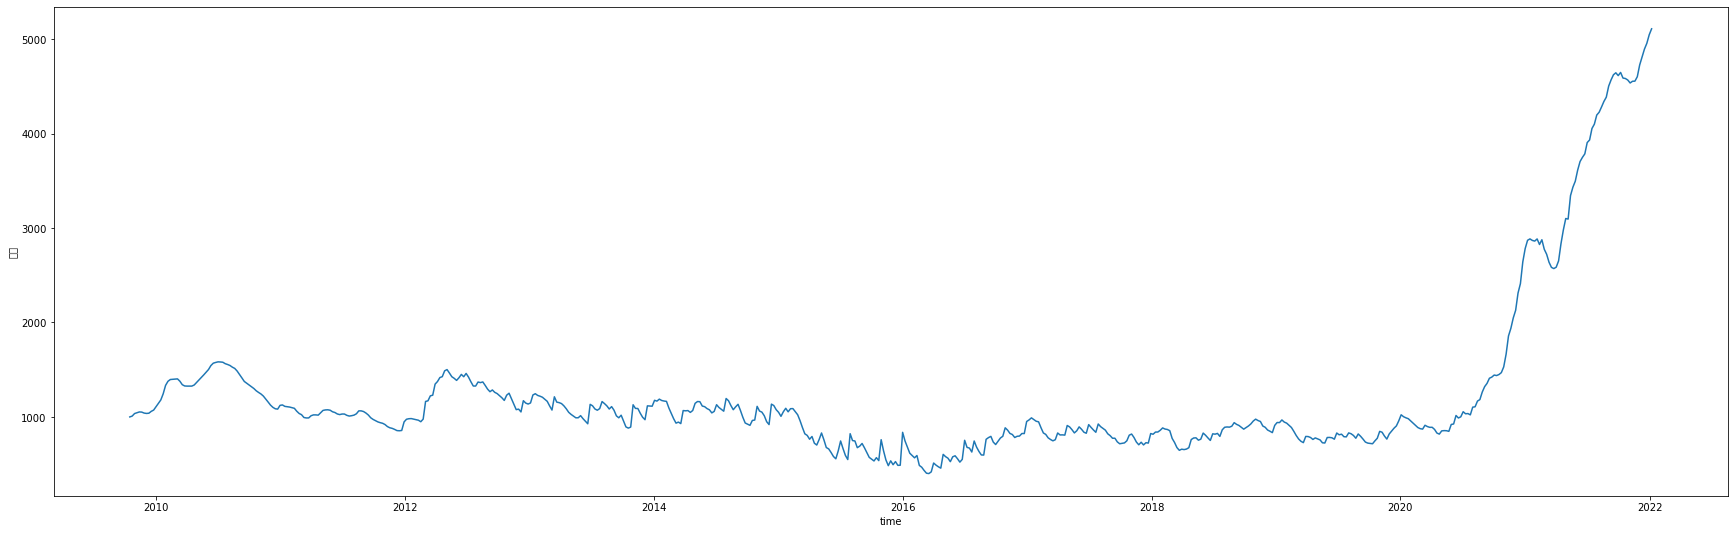

In [10]:
# SCFI 지수 시각화 
plt.figure(figsize=(30, 9))
sns.lineplot(y=SCFI_df['SCFI Comprehensive Container Freight Rate Index'], x=SCFI_df['date_dt'])
plt.xlabel('time')
plt.ylabel('지수')

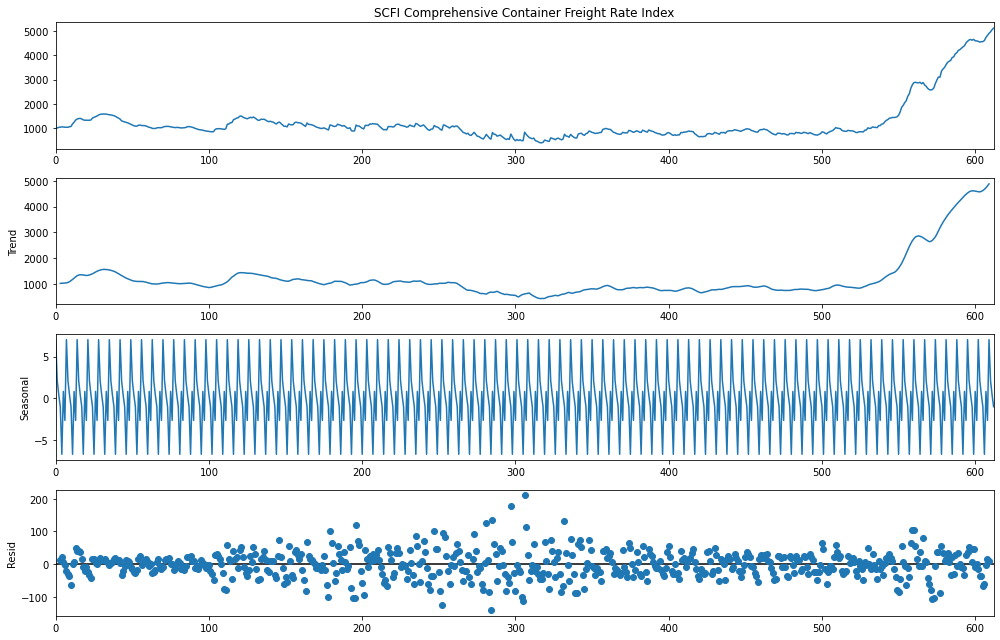

In [37]:
PERIOD = 300
assert PERIOD % 60 == 0 and 3600 % PERIOD == 0

MINUTE = 60 / PERIOD
HOUR = 3600 // PERIOD
DAY = HOUR * 24
WEEK = 7 * DAY

from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(SCFI_df['SCFI Comprehensive Container Freight Rate Index'], period=7)
res.plot()
plt.show()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts = SCFI_df.timeseries
result = seasonal_decompose(ts, model='additive')


plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


AttributeError: 'DataFrame' object has no attribute 'timeseries'

In [13]:
Corona_SCFI_df=SCFI_df.query('"2019-12-01"<= date_dt')
Corona_SCFI_df.head()

,Date,SCFI Comprehensive Container Freight Rate Index,Shanghai-Europe (base port),SCFI Shanghai-Med (base port),SCFI Shanghai-WC America (base port),SCFI Shanghai-EC America (base port),SCFI Shanghai-Persian Gulf (Dubai),SCFI Shanghai-ANZ (Melbourne),SCFI Shanghai-W Africa (Lagos),SCFI Shanghai-S Africa (Durban),SCFI Shanghai-S America (Santos),SCFI Shanghai-W Japan (base port),SCFI Shanghai-E Japan (base port),SCFI Shanghai-SE Asia (Singapore),SCFI Shanghai-Korea (Pusan),date_dt
505,06-Dec-19,850.27,800,771,"1,509.00","2,638.00",930,760,"2,259.00",996,"1,747.00",226.0,241.0,158,121.0,2019-12-06
506,13-Dec-19,880.44,893,"1,083.00","1,370.00","2,512.00","1,017.00",740,"2,209.00",993,"2,014.00",226.0,241.0,158,121.0,2019-12-13
507,20-Dec-19,904.83,944,"1,096.00","1,342.00","2,451.00","1,158.00",774,"2,335.00","1,012.00","2,000.00",226.0,240.0,163,121.0,2019-12-20
508,27-Dec-19,958.57,"1,027.00","1,172.00","1,434.00","2,562.00","1,172.00",929,"2,521.00","1,076.00","2,236.00",226.0,240.0,173,112.0,2019-12-27
509,03-Jan-20,1022.72,"1,124.00","1,185.00","1,636.00","2,808.00","1,218.00",949,"2,744.00","1,159.00","2,183.00",226.0,242.0,176,118.0,2020-01-03


In [14]:
print(Corona_SCFI_df.shape)

(108, 16)


In [52]:
Corona_SCFI_df['Date'] = Corona_SCFI_df['date_dt']
Corona_SCFI_df.head()
Corona_SCFI_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 505 to 612
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             108 non-null    datetime64[ns]
 1   SCFI Comprehensive Container Freight Rate Index  108 non-null    float64       
 2   Shanghai-Europe (base port)                      108 non-null    object        
 3   SCFI Shanghai-Med (base port)                    108 non-null    object        
 4   SCFI Shanghai-WC America (base port)             108 non-null    object        
 5   SCFI Shanghai-EC America (base port)             108 non-null    object        
 6   SCFI Shanghai-Persian Gulf (Dubai)               108 non-null    object        
 7   SCFI Shanghai-ANZ (Melbourne)                    108 non-null    object        
 8   SCFI Shanghai-W Africa (Lagos)        

<ipython-input-52-1e26e9ebfb3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Corona_SCFI_df['Date'] = Corona_SCFI_df['date_dt']


Text(0, 0.5, '지수')

C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hyunj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


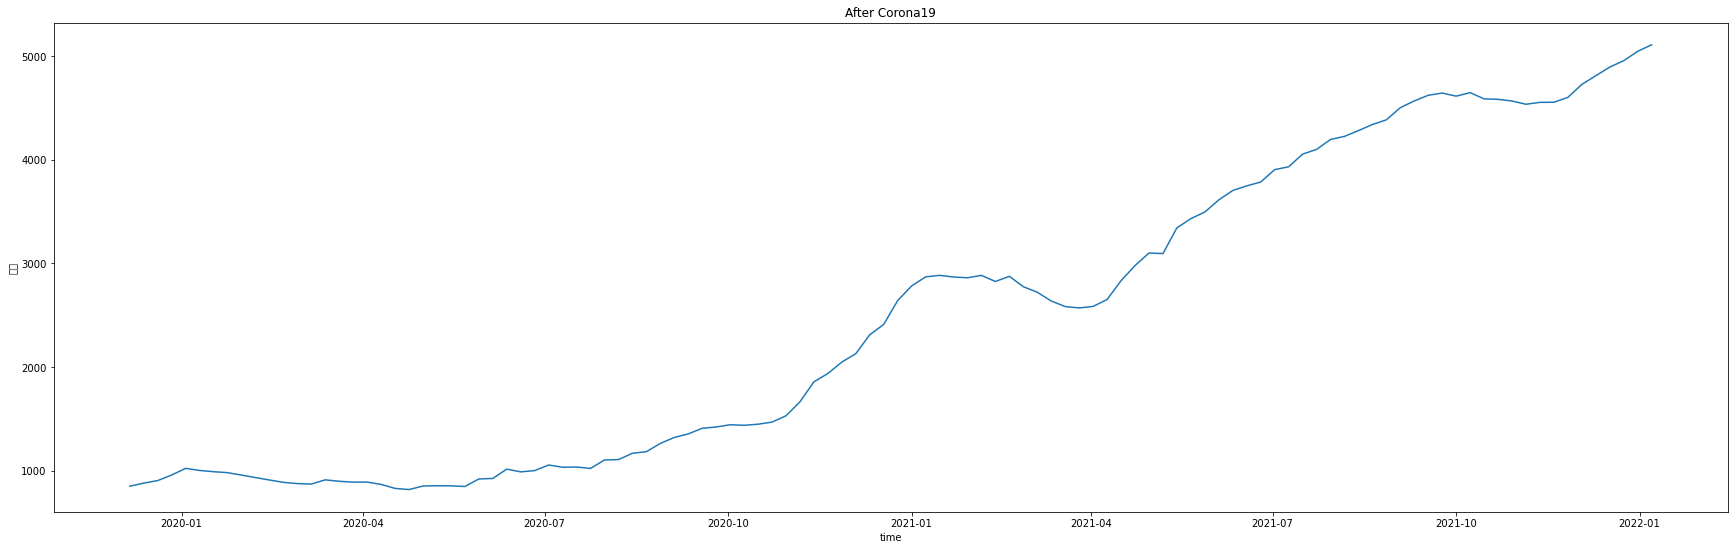

In [15]:
# SCFI 지수 시각화 
plt.figure(figsize=(30, 9))
plt.title('After Corona19')
sns.lineplot(y=Corona_SCFI_df['SCFI Comprehensive Container Freight Rate Index'], x=Corona_SCFI_df['date_dt'])
plt.xlabel('time')
plt.ylabel('지수')

여기에 대해서 한 번 분할을 이용해보자

In [18]:
# 전통적인 시계열 분해 방법
# - 가법 : 원본데이터가 일정하게 안정적인 그래프를 그리는 형태
# - 승법 : 증가하거나 감소하는 형태 


# 일단 내 생각으로는 코로나 이후의 해상 운임 지수는 일정하게 증가(근데 중간에 감소되기는 함)해서 가법이라고 생각함

가법

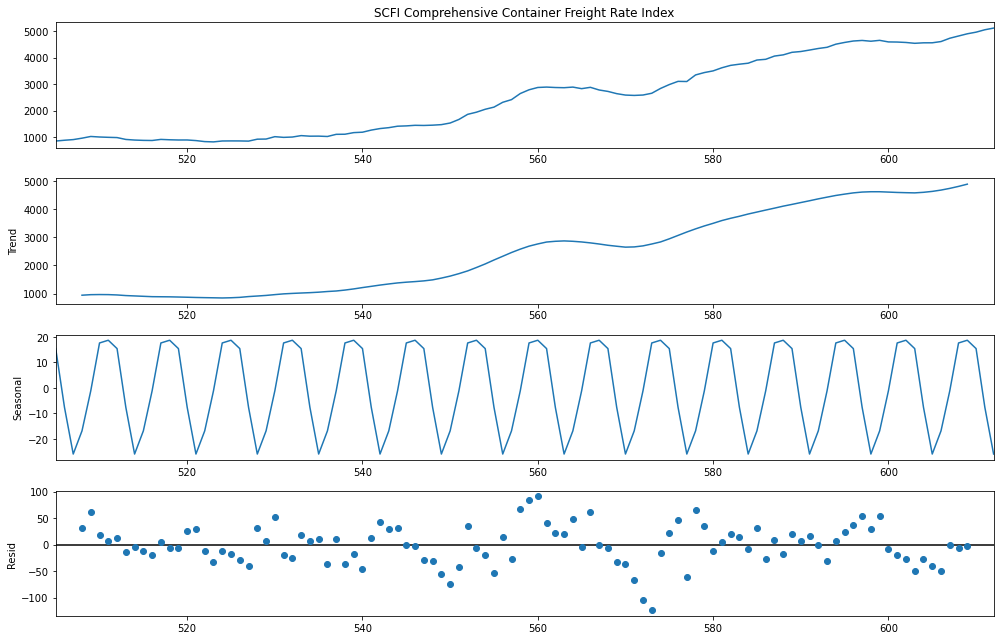

In [51]:
import statsmodels.api as sm

# split data as trend + seasonal + residual
plt.rcParams['figure.figsize'] = (14, 9)
# 분기별 데이터는 4, 월별 데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 초기설정하는 것을 추천
sm.tsa.seasonal_decompose(Corona_SCFI_df['SCFI Comprehensive Container Freight Rate Index'], model = 'addictive',
                          period=7).plot()
plt.show()